In [75]:
from skfp.datasets.moleculenet import load_bace, load_clintox, load_bbbp, load_esol, load_lipophilicity, load_muv, load_pcba, load_tox21, load_toxcast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def null_na_values(column_nr, df):
    print(f'For column {column_nr}:')
    amount_of_null_values = df.loc[column_nr,:].isnull().sum().sum()
    print(f"\tNull values: ", amount_of_null_values)
    amount_of_na_values = df.loc[column_nr,:].isna().sum().sum()
    print(f"\tNa values: ", amount_of_na_values)
    return amount_of_null_values, amount_of_na_values

def examine_dataset(ds, binary_classes=True):
    df = pd.DataFrame(ds)
    print("Dataset shape: ", df.shape)
    amount_of_null_values0, amount_of_na_values0 = null_na_values(0, df)
    print()
    amount_of_null_values1, amount_of_na_values1 = null_na_values(1, df)

    print("Data: \n======================\n", df.head(), "\n======================\n")

    if amount_of_na_values1 != 0:
        df = df.fillna(0)

    labels = df.loc[1,:]
    if binary_classes:
        label_classes = labels.unique()
        print("Labels classes: ", label_classes)
    else:
        print(labels)
        label_classes = np.sort(labels.unique())
        print(f"Len labels: {len(labels)}, len label classes: {len(label_classes)}")
        label_min = min(labels)
        label_max = max(labels)
        print(f"Label stats: min: {label_min}, max: {label_max}, mean: {np.mean(labels)}, std: {np.std(labels)}")
        plt.hist(labels, bins=len(label_classes))
        plt.show()
        plt.boxplot(labels)
        plt.show()

        # print("Labels classes float: ", label_classes)

In [155]:
examine_dataset(load_bace())

Dataset shape:  (2, 1513)
For column 0:
	Null values:  0
	Na values:  0

For column 1:
	Null values:  0
	Na values:  0
Data: 
 0    O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...
1                                                    1
Name: 0, dtype: object 

Labels classes:  [1 0]


In [46]:
examine_dataset(load_bbbp())

Dataset shape:  (2, 2039)
Labels classes:  [1 0]
Data: 
 0    [Cl].CC(C)NCC(O)COc1cccc2ccccc12
1                                   1
Name: 0, dtype: object 

For column 0:
	Null values:  0
	Na values:  0

For column 1:
	Null values:  0
	Na values:  0


In [ ]:
def null_na_values(column_nr, df):
    print(f'For column {column_nr}:')
    amount_of_na_values = df.loc[column_nr,:].isna().sum().sum()
    print(f"\tNa values: ", amount_of_na_values)

def examine_dataset_clintox(ds):
    df = pd.DataFrame(ds)
    print("Dataset shape: ", df.shape)

    labels = df.loc[1,:]
    labels = list(labels)
    labels = np.array(labels)
    lab_left = labels[:, 0]
    lab_right = labels[:, 1]
    print(len(lab_left), len(lab_right))

    label_classes_left = np.unique(lab_left)
    label_classes_right = np.unique(lab_right)
    print("Labels classes left: ", label_classes_left)
    print("Labels classes right: ", label_classes_right)
    
    print("Data: \n======================\n", df.loc[:,0], "\n======================\n")

    null_na_values(0, df)
    print()
    null_na_values(1, df)

examine_dataset_clintox(load_clintox())

Dataset shape:  (2, 1477)
1477 1477
Labels classes left:  [0 1]
Labels classes right:  [0 1]
Data: 
 0    [C@@H]1([C@@H]([C@@H]([C@H]([C@@H]([C@@H]1Cl)C...
1                                               [1, 0]
Name: 0, dtype: object 

For column 0:
	Null values:  0
	Na values:  0

For column 1:
	Null values:  0
	Na values:  0


Dataset shape:  (2, 1128)
Len labels: 1128, len label classes: 734
Label stats: min: -11.6, max: 1.58, mean: -3.0501019503546094, std: 2.0955117304559443


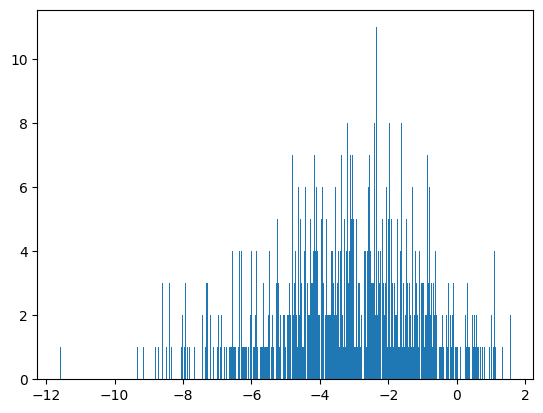

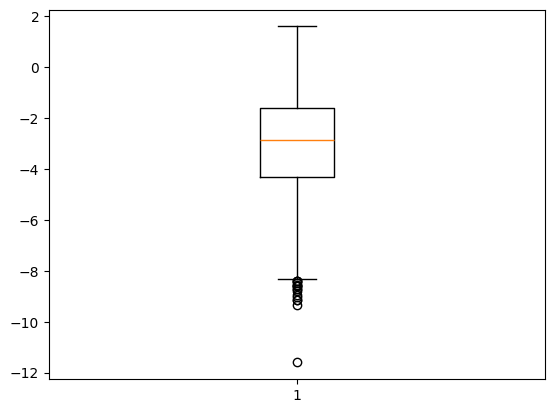

Data: 
 0    OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1                                                -0.77
Name: 0, dtype: object 

For column 0:
	Null values:  0
	Na values:  0

For column 1:
	Null values:  0
	Na values:  0


In [97]:
examine_dataset(load_esol(), False)

Dataset shape:  (2, 4200)
Len labels: 4200, len label classes: 553
Label stats: min: -1.5, max: 4.5, mean: 2.1863357142857165, std: 1.2028604901336188


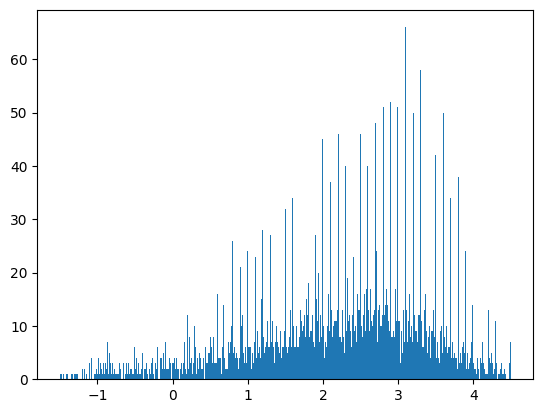

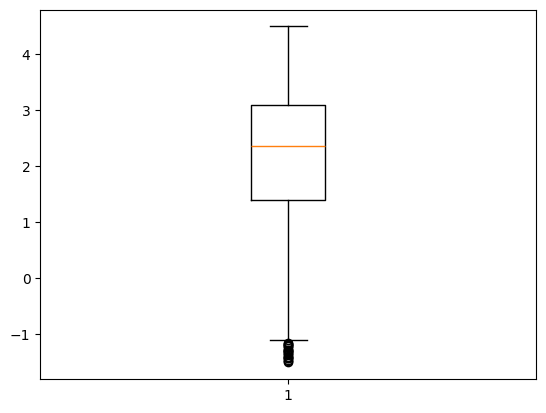

Data: 
 0    Cn1c(CN2CCN(CC2)c3ccc(Cl)cc3)nc4ccccc14
1                                       3.54
Name: 0, dtype: object 

For column 0:
	Null values:  0
	Na values:  0

For column 1:
	Null values:  0
	Na values:  0


In [98]:
examine_dataset(load_lipophilicity(), False)

In [ ]:
def null_na_values(column_nr, df):
    print(f'For column {column_nr}:')
    amount_of_na_values = (np.isnan(list(df.loc[1,:])).sum(axis=1)).sum()
    print(f"\tNa values: ", amount_of_na_values)
    return amount_of_na_values

def examine_dataset_for_list(ds, binary_classes=True):
    df = pd.DataFrame(ds)
    print("Dataset shape: ", df.shape)
    amount_of_na_values0 = null_na_values(0, df)
    print()
    amount_of_na_values1 = null_na_values(1, df)

    print("Data: \n======================\n", df.loc[:,0], "\n======================\n")

    values = set()
    if amount_of_na_values1 != 0:
        for row in df.loc[1,:]:
            np.nan_to_num(row, copy=False)
            for v in row:
                values.add(v)

    labels = np.array(values)
    print("Values: ", labels)


In [ ]:
examine_dataset_for_list(load_muv(), False)


Dataset shape:  (2, 93087)
For column 0:
	Na values:  1332593

For column 1:
	Na values:  1332593
Data: 
 0      Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1    [nan, nan, nan, nan, nan, nan, nan, 0.0, nan, ...
Name: 0, dtype: object 

{0.0, 1.0}


In [182]:
examine_dataset_for_list(load_pcba())

Dataset shape:  (2, 437929)
For column 0:
	Na values:  22037742

For column 1:
	Na values:  22037742
Data: 
 0                 CC(=O)N1CCC2(CC1)NC(=O)N(c1ccccc1)N2
1    [0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: 0, dtype: object 

{0.0, 1.0}


In [183]:
examine_dataset_for_list(load_tox21())

Dataset shape:  (2, 7831)
For column 0:
	Na values:  16026

For column 1:
	Na values:  16026
Data: 
 0                         CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1    [0.0, 0.0, 1.0, nan, nan, 0.0, 0.0, 1.0, 0.0, ...
Name: 0, dtype: object 

{0.0, 1.0}


In [184]:
examine_dataset_for_list(load_toxcast())

Dataset shape:  (2, 8576)
For column 0:
	Na values:  3757732

For column 1:
	Na values:  3757732
Data: 
 0                          [O-][N+](=O)C1=CC=C(Cl)C=C1
1    [0.0, 0.0, nan, nan, nan, nan, nan, nan, nan, ...
Name: 0, dtype: object 

{0.0, 1.0}


# TDC

In [198]:
def null_na_values(column_nr, df):
    print(f'For column {column_nr}:')
    amount_of_null_values = df.loc[column_nr,:].isnull().sum().sum()
    print(f"\tNull values: ", amount_of_null_values)
    amount_of_na_values = df.loc[column_nr,:].isna().sum().sum()
    print(f"\tNa values: ", amount_of_na_values)
    return amount_of_null_values, amount_of_na_values

def examine_dataset_TDC(ds, binary_classes=True):
    df = pd.DataFrame(ds)
    print("Dataset shape: ", df.shape)
    amount_of_null_values0, amount_of_na_values0 = null_na_values(0, df)
    print()
    amount_of_null_values1, amount_of_na_values1 = null_na_values(1, df)

    print("Data: \n======================\n", df.head(), "\n======================\n")

    if amount_of_na_values1 != 0:
        df = df.fillna(0)

    labels = df['Y']
    if binary_classes:
        label_classes = labels.unique()
        print("Labels classes: ", label_classes)
    else:
        print(labels)
        label_classes = np.sort(labels.unique())
        print(f"Len labels: {len(labels)}, len label classes: {len(label_classes)}")
        label_min = min(labels)
        label_max = max(labels)
        print(f"Label stats: min: {label_min}, max: {label_max}, mean: {np.mean(labels)}, std: {np.std(labels)}")
        plt.hist(labels, bins=len(label_classes))
        plt.show()
        plt.boxplot(labels)
        plt.show()

        # print("Labels classes float: ", label_classes)

In [199]:
from tdc.single_pred import ADME
data = ADME(name = 'Caco2_Wang')
split = data.get_split()
train, valid, test = split['train'], split['valid'], split['test']

Found local copy...
Loading...
Done!


Dataset shape:  (637, 2)
For column 0:
	Null values:  0
	Na values:  0

For column 1:
	Null values:  0
	Na values:  0
Data: 
                                                 Drug     Y
0            Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2 -6.22
1                   C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C -3.86
2  COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2... -4.09
3  C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(... -4.84
4  C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C... -6.12 

0     -6.22
1     -3.86
2     -4.09
3     -4.84
4     -6.12
       ... 
632   -5.36
633   -5.32
634   -5.97
635   -4.95
636   -4.84
Name: Y, Length: 637, dtype: float64
Len labels: 637, len label classes: 455
Label stats: min: -7.619999900000002, max: -3.729485, mean: -5.251132117739403, std: 0.7827801163706717


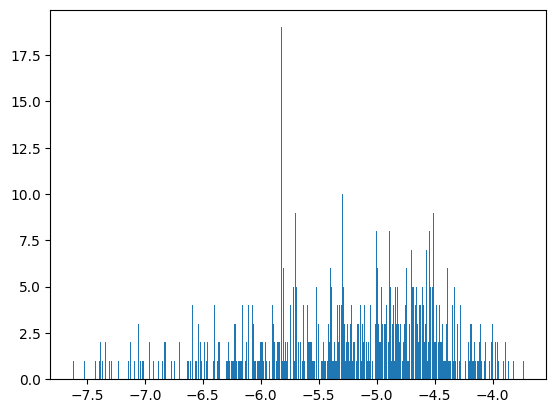

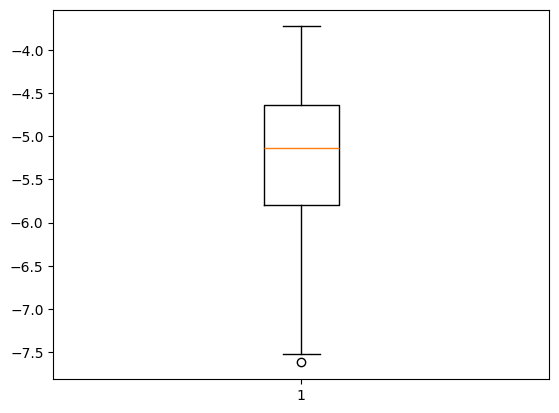

In [200]:
ds = train.drop(columns=['Drug_ID'])
examine_dataset_TDC(ds, False)